# Exploratory Data Analysis

## Importing the Libraries

In [151]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

from sklearn.datasets import fetch_openml
from scipy.ndimage import gaussian_filter

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.model_selection import KFold
import torch.nn.functional as F 



In [153]:
#Checking the gpu availability in mac for using torch
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


## Importing the Dataset

In [154]:
#Load Fashion-Mnist Dataset
fashion_mnist = fetch_openml(name="Fashion-MNIST", cache = True)
fashion_mnist_df = pd.DataFrame(fashion_mnist.data, columns=fashion_mnist.feature_names)
fashion_mnist_df['target'] = fashion_mnist['target'].astype(int)
fashion_mnist_df.head(10)

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7     0.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     0.0   
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...     114.0     130.0      76.0       0.0       0.0       0.0   
2     22.0  ...       0.0       1.0       0.0       0.0       0.0       0.0   
3     96.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
5     22.0  ...       0.0       0.0       0.0     133.0     167.0      73.0   
6      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
7      0.0  ...       0.0       3.0       0.0      82.0     237.0     231.0   
8      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
9      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.0       0.0       9  
1       0.0       0.0       0.0       0  
2       0.0       0.0       0.0       0  
3       0.0       0.0       0.0       3  
4       0.0       0.0       0.0       0  
5       0.0       0.0       0.0       2  
6       0.0       0.0       0.0       7  
7      70.0       0.0       0.0       2  
8       0.0       0.0       0.0       5  
9       0.0       0.0       0.0       5  

[10 rows x 785 columns]

In [155]:
fashion_mnist_df.shape

(70000, 785)

In [79]:
#Checking missing values in the dataset
fashion_mnist_df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64

We find that there are no missing values in the dataset.

## Splitting the Dataset

In [156]:
X = fashion_mnist_df.drop('target', axis = 1).values #Get the data 28x28 total 784 features
y = fashion_mnist_df['target'].values #Get the target values or class

#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## Visualizing the images from the Dataset

In [157]:
xtrain = X_train.reshape((60000, 28, 28, 1))
xtest = X_test.reshape((10000, 28, 28, 1))

In [158]:
class_label_names = [
                     "T-shirt/top", "Trouser", "Pullover", 
                     "Dress", "Coat","Sandal", "Shirt", 
                     "Sneaker", "Bag", "Ankle boot"
                    ]

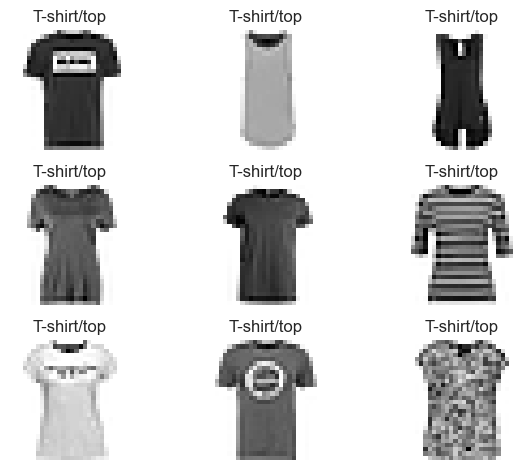

-----------------------------------------------------------------------


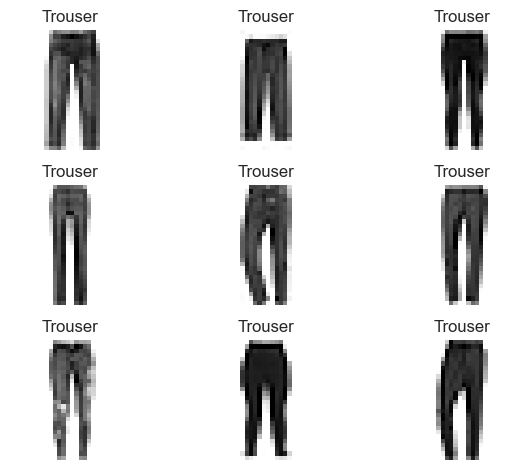

-----------------------------------------------------------------------


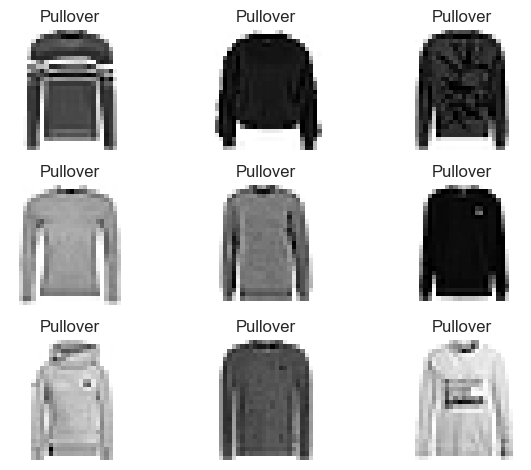

-----------------------------------------------------------------------


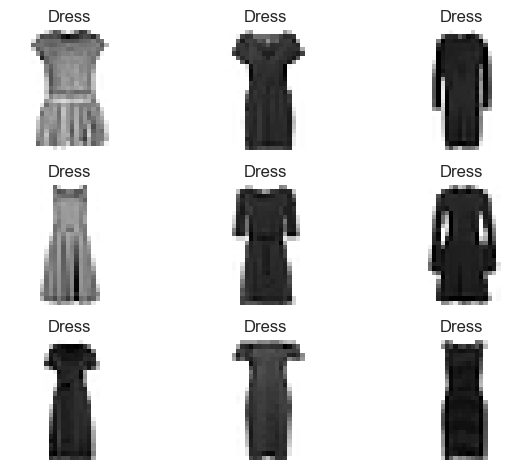

-----------------------------------------------------------------------


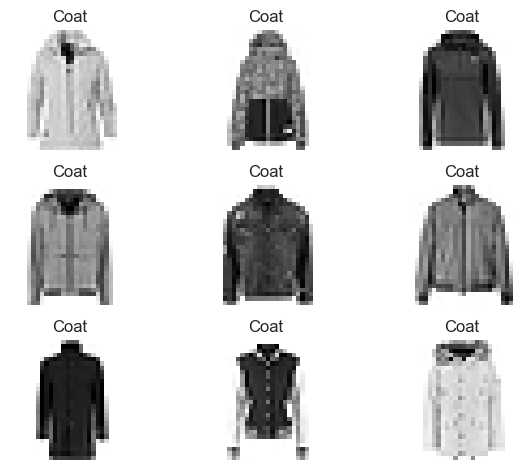

-----------------------------------------------------------------------


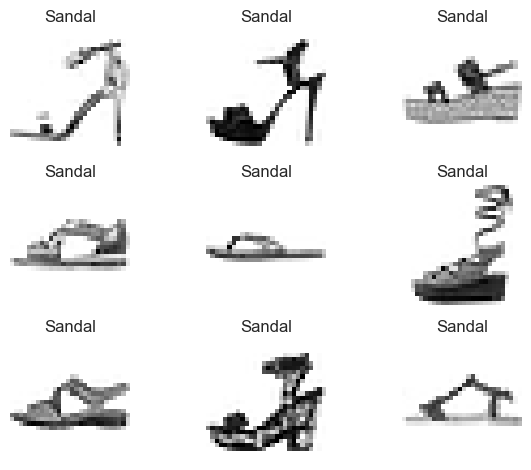

-----------------------------------------------------------------------


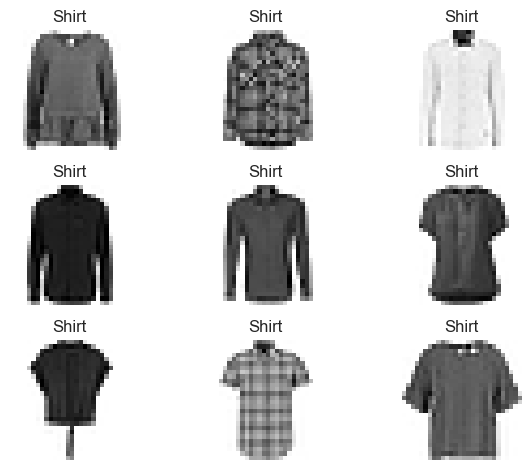

-----------------------------------------------------------------------


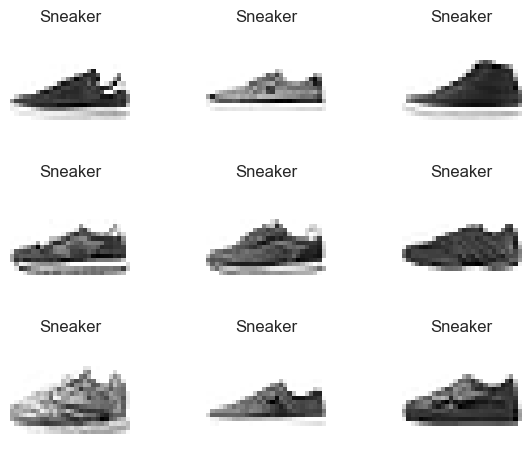

-----------------------------------------------------------------------


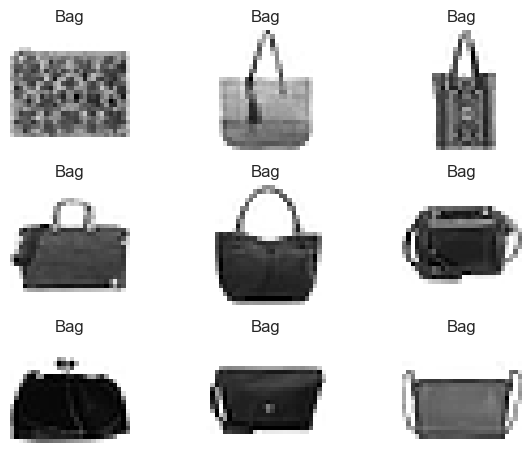

-----------------------------------------------------------------------


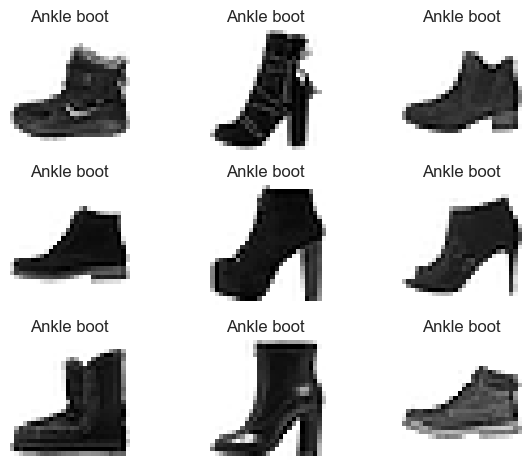

-----------------------------------------------------------------------


In [159]:
def get_class_indices(y, n=9):
    return [{ i : np.where(y == i)[0][:n]} for i in range(len(class_label_names))]

class_indices = get_class_indices(y_train)


num_classes = len(class_label_names)

for num, k in enumerate(class_indices):
    for i, example in enumerate(k[num]):
        plt.subplot(3, 3, i+1)
        g = plt.imshow(X_train.reshape(-1, 28, 28, 1)[example][:, :, 0], cmap=plt.cm.binary)
        plt.title(class_label_names[y[example]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("-----------------------------------------------------------------------")

## Checking the Class Distribution

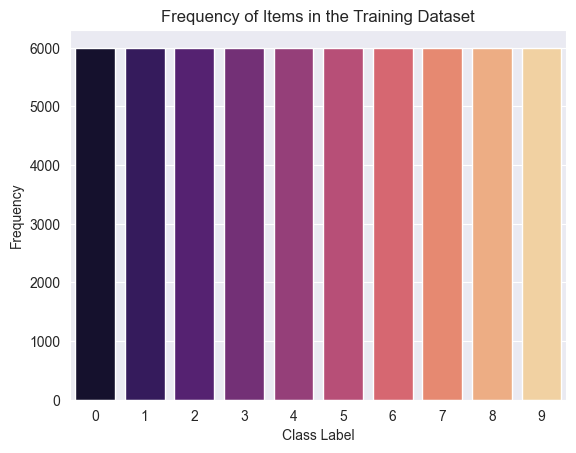

In [160]:
sns.countplot(x = y_train, palette="magma")

plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Frequency of Items in the Training Dataset")

# Show the plot
plt.show()

In [161]:
train_unique, train_counts = np.unique(y_train, return_counts=True)
train_value_counts = dict(zip(train_unique, train_counts))

print(train_value_counts)

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


**We find that the Training dataset is perfectly Balanced**
<br>
**Each of the 10 classes has exactly 6000 images**

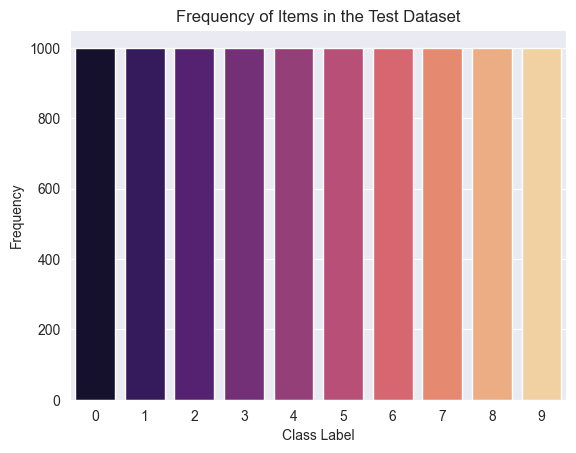

In [162]:
sns.countplot(x = y_test, palette="magma")

plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Frequency of Items in the Test Dataset")

# Show the plot
plt.show()

In [163]:
test_unique, test_counts = np.unique(y_test, return_counts=True)
test_value_counts = dict(zip(test_unique, test_counts))

print(test_value_counts)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


**We find that the Test dataset is also perfectly Balanced**
<br>
**Each of the 10 classes has exactly 1000 images**

## Pixel Intensity Analysis

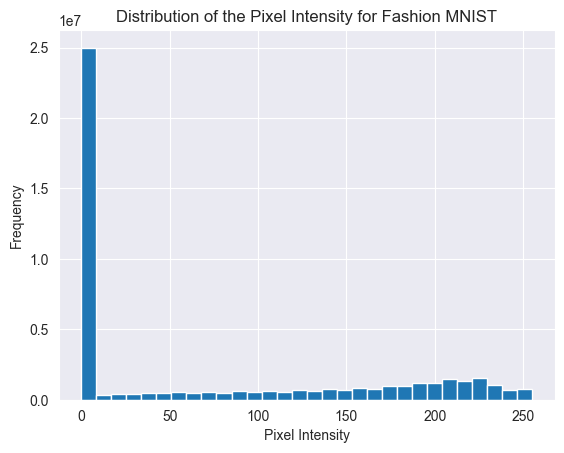

In [164]:
pix = xtrain.flatten()

plt.hist(pix, bins=30, range=[0,255])
plt.title('Distribution of the Pixel Intensity for Fashion MNIST')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [165]:
print(f'Pixel values range from {xtrain.min()} to {xtrain.max()}')
print("Pixel Intensity - Mean: ", np.mean(pix))
print("Pixel Intensity - Median: ", np.median(pix))
print("Pixel Intensity - Standard Deviation: ", np.std(pix))

Pixel values range from 0.0 to 255.0
Pixel Intensity - Mean:  72.94035223214286
Pixel Intensity - Median:  0.0
Pixel Intensity - Standard Deviation:  90.02118235130519


**As expected majority of the pixels are black as the dataset consists of grayscale images**

In [166]:
fashion_mnist_df.iloc[:,:-1].describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000771      0.006414      0.034486      0.098886      0.247843   
std        0.087339      0.296605      1.200882      2.458872      4.408110   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     45.000000    218.000000    185.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9      pixel10  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.00000   
mean       0.408714      0.802900      2.204386      5.634900     14.41000   
std        5.842288      8.186472     14.117208     23.698865     38.18827   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%        0.000000      0.000000      0.000000      0.000000      0.00000   
75%        0.000000      0.000000      0.000000      0.000000      0.00000   
max      230.000000    224.000000    225.000000    254.000000    255.00000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  70000.000000  70000.000000  70000.000000  70000.000000   
mean   ...     34.582314     23.288643     16.611600     17.823371   
std    ...     57.584612     48.935288     42.075046     43.901606   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     57.000000      8.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781     pixel782      pixel783  \
count  70000.000000  70000.000000  70000.000000  70000.00000  70000.000000   
mean      22.887986     17.968129      8.524043      2.75140      0.836529   
std       51.853192     45.231601     29.527900     17.38577      9.258426   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      0.000000      0.000000      0.00000      0.000000   
75%        0.000000      0.000000      0.000000      0.00000      0.000000   
max      255.000000    255.000000    255.000000    255.00000    255.000000   

           pixel784  
count  70000.000000  
mean       0.072914  
std        2.129924  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      170.000000  

[8 rows x 784 columns]

### Pixel Intensity for Each Class

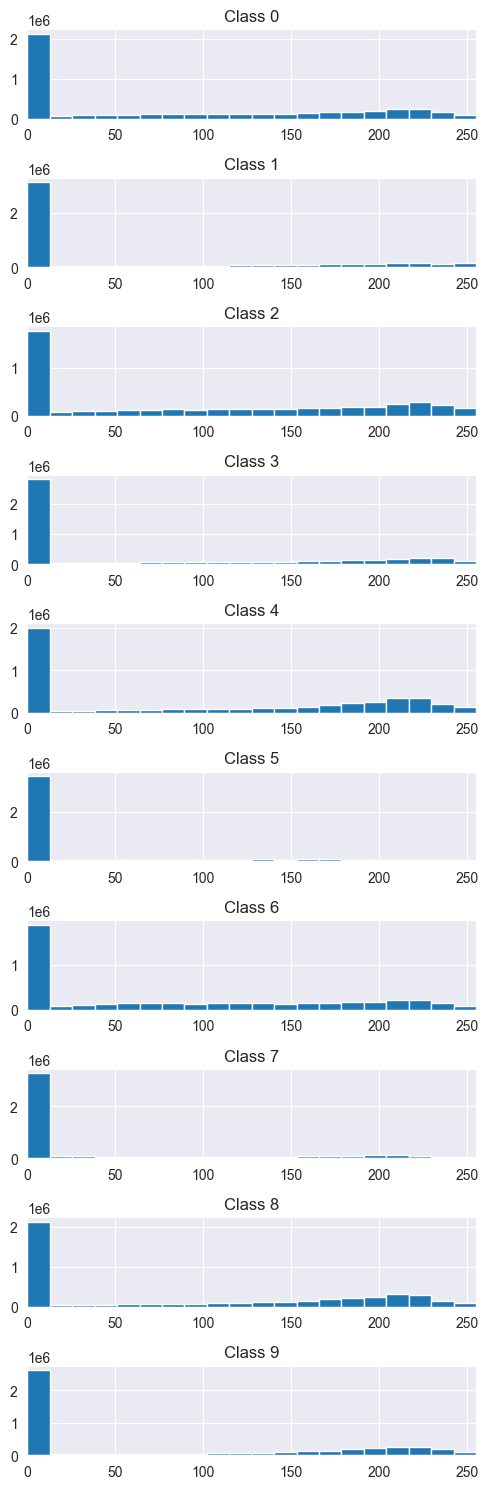

In [167]:
fig, axes = plt.subplots(10, 1, figsize=(5, 15))

for i in range(10):
    class_pix = xtrain[y_train == i].flatten()
    axes[i].hist(class_pix, bins=20, range=[0,255])
    axes[i].set_title(f'Class {i}')
    axes[i].set_xlim([0, 255])

plt.tight_layout()
plt.show()

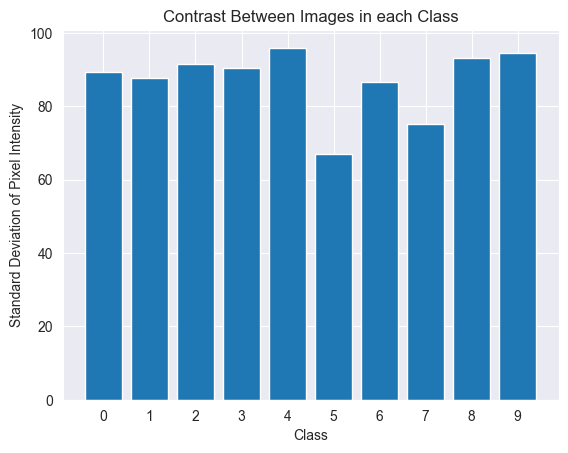

In [168]:
contrast_per_class = [np.std(xtrain[y_train == i].flatten()) for i in range(10)]

plt.bar(range(10), contrast_per_class)
plt.xlabel('Class')
plt.ylabel('Standard Deviation of Pixel Intensity')
plt.title('Contrast Between Images in each Class')
plt.xticks(range(10))
plt.show()

## Dimensionality Reduction 

In [169]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

xtrain_pca = pca.fit_transform(X_train)
print("Shape of Dataset after Dimensionality Reduction with PCA: ", xtrain_pca.shape)

Shape of Dataset after Dimensionality Reduction with PCA:  (60000, 2)


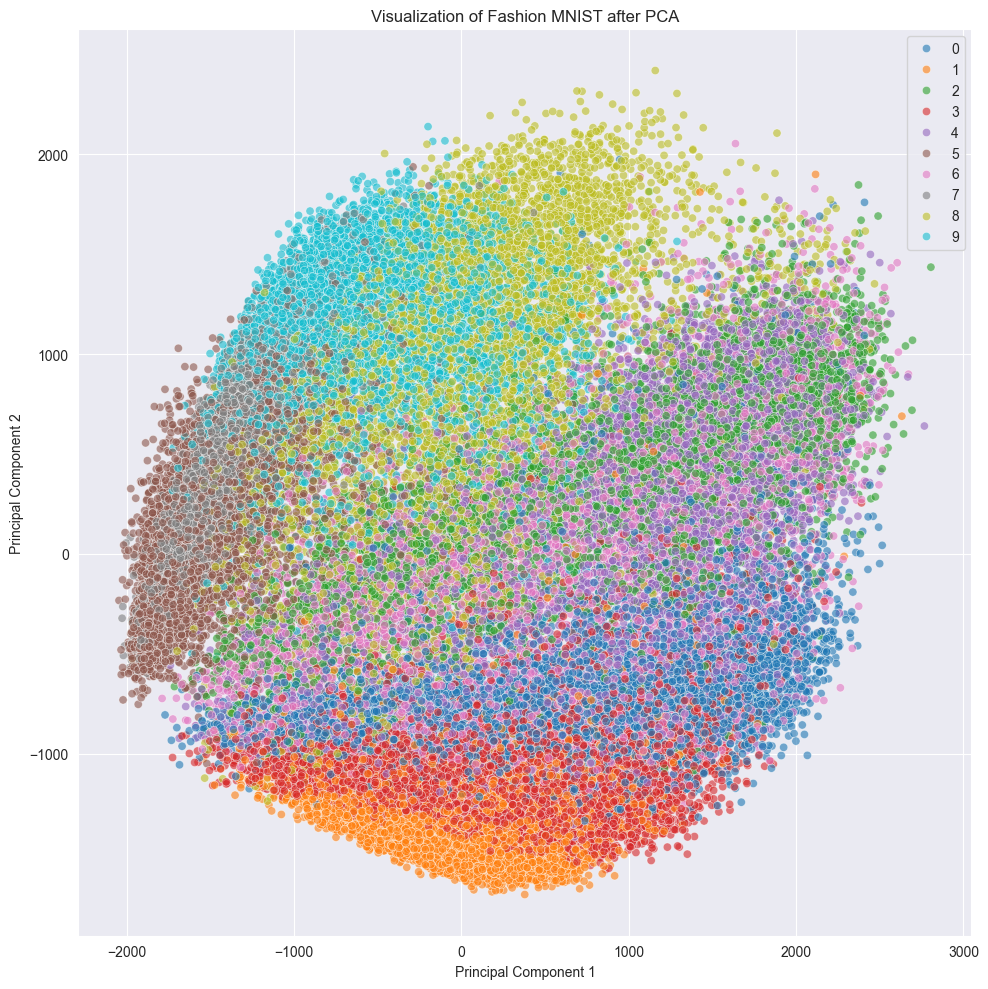

In [170]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = xtrain_pca[:,0], y = xtrain_pca[:,1], alpha = 0.6, hue = y_train, palette=sns.color_palette("tab10", 10))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualization of Fashion MNIST after PCA")
plt.tight_layout()
plt.show()

In [171]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_train)

print("Shape of Dataset after Dimensionality Reduction with t-SNE: ", X_tsne.shape)

Shape of Dataset after Dimensionality Reduction with t-SNE:  (60000, 2)


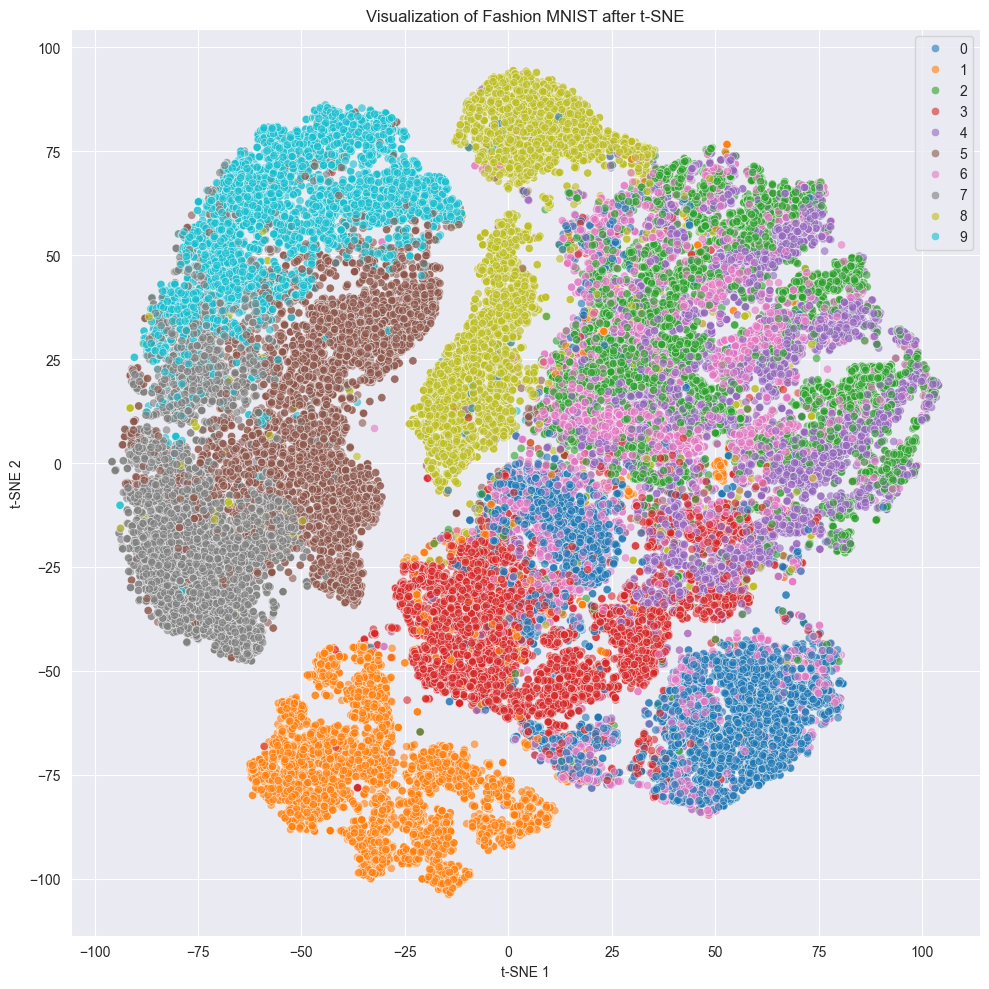

In [172]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], alpha = 0.6, 
                hue = y_train, palette=sns.color_palette("tab10", 10))
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualization of Fashion MNIST after t-SNE")
plt.tight_layout()
plt.show()

# Model Training 

## Training, validation, and test splits:
 - **We have the split the training and test sets into 60,000 and 10,000 samples respectively**
 - **Further, with each model we have used cross validation to get multiple training and validation sets to tune the hyperparameters with GridSearch and RandomSearch**
 - **Please find the code for the hyperparameter tuning for each of the models in the respective notebooks**
 - We have included the GridSearch code for the Logistic Regression model as it takes the least time to run. We have performed hyperparameter tuning for the other models in a similar fashion

## Data Preprocessing 

 - **The Fashion MNIST dataset is used for benchmarking algorithms, and hence is popular for being clean, well-prepared and ready-to-use for machine learning models** 
 - **Further, we have noticed that both the training and testing datasets are perfectly balanced across all the classes.**
 - **We have a large dataset, and since it is sufficient for training traditional machine learning and simple deep learning models we have not included any data augmentation step to further increase the size of the dataset.** 

### Feature Scaling

In [173]:
#Coverting the scale of pixels from 0-255 to 0-1 
X_train = X_train/255.0
X_test = X_test/255.0

### Removing Noise

In [174]:
# Removing Noise from the Images
#X_train_filtered = gaussian_filter(X_train, sigma=1)

**Removing noise with gaussian filter blurs the image to an extent that it affects the model performance**
**The Fashion MNIST dataset is already clean and ready-to-use.**

### Dimensionality Reduction - PCA

In [175]:
pca = PCA(n_components = 0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [176]:
print("X_train shape after Dimensionality Reduction: ",X_train_pca.shape)
print("X_test shape after Dimensionality Reduction: ", X_test_pca.shape)

X_train shape after Dimensionality Reduction:  (60000, 187)
X_test shape after Dimensionality Reduction:  (10000, 187)


In [177]:
print("The total variance campured after Dimensionality Reduction is: ", np.sum(pca.explained_variance_ratio_))

The total variance campured after Dimensionality Reduction is:  0.9500039103537354


In [178]:
# Defining variables for comparison
model_metrics = {}
class_label_names = [
                     "T-shirt/top", "Trouser", "Pullover", 
                     "Dress", "Coat","Sandal", "Shirt", 
                     "Sneaker", "Bag", "Ankle boot"
                    ]

In [179]:
# Defining function to plot the Confusion Matrix
def plot_cm(cm, model_name):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='Blues', xticklabels=class_label_names, yticklabels=class_label_names)
    plt.xlabel('Predicted Label', fontsize = 15)
    plt.ylabel('True Label', fontsize = 15)
    plt.title('Confusion Matrix for {}'.format(model_name), fontsize = 20)
    plt.tight_layout()
    plt.show()

In [180]:
def metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = "weighted")
    precision = precision_score(y_test, y_pred, average = "weighted")
    f1 = f1_score(y_test, y_pred, average = "weighted")
    return [acc, recall, precision, f1]

## Logistic Regression

In [181]:
# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [50, 100]}

# Initialize the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', return_train_score = True, verbose=10)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model_logreg = grid_search.best_estimator_

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3; 1/14] START C=0.001, max_iter=50.......................................
[CV 1/3; 1/14] END C=0.001, max_iter=50;, score=(train=0.815, test=0.814) total time=   1.8s
[CV 2/3; 1/14] START C=0.001, max_iter=50.......................................
[CV 2/3; 1/14] END C=0.001, max_iter=50;, score=(train=0.814, test=0.814) total time=   1.7s
[CV 3/3; 1/14] START C=0.001, max_iter=50.......................................
[CV 3/3; 1/14] END C=0.001, max_iter=50;, score=(train=0.815, test=0.812) total time=   1.5s
[CV 1/3; 2/14] START C=0.001, max_iter=100......................................
[CV 1/3; 2/14] END C=0.001, max_iter=100;, score=(train=0.815, test=0.814) total time=   2.8s
[CV 2/3; 2/14] START C=0.001, max_iter=100......................................
[CV 2/3; 2/14] END C=0.001, max_iter=100;, score=(train=0.814, test=0.814) total time=   2.7s
[CV 3/3; 2/14] START C=0.001, max_iter=100.........................

In [182]:
# Evaluate the best model
# Make predictions on the test set using the best model
y_pred_logreg = best_model_logreg.predict(X_test_pca)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")

# Display classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Accuracy: 84.22%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.62      0.56      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



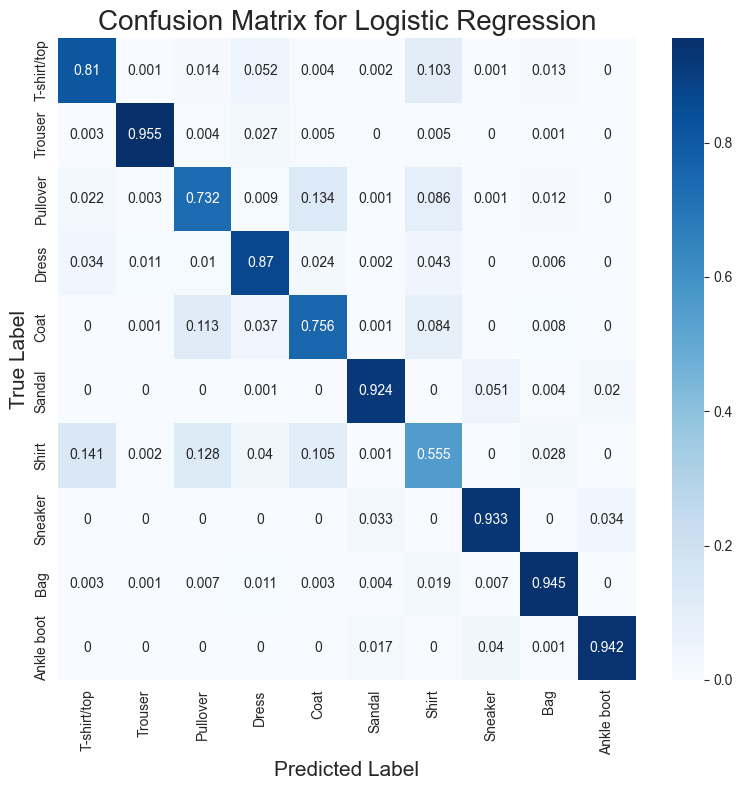

In [183]:
model_name = "Logistic Regression"
model_metrics.update({model_name: metrics(y_test, y_pred_logreg)})

cm = confusion_matrix(y_test, y_pred_logreg)
plot_cm(cm, model_name)

## K Nearest Neighbors

In [184]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 4, weights = 'distance')
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [185]:
y_pred_knn = knn.predict(X_test_pca)

In [186]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 86.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.92      0.89      0.90      1000
           4       0.79      0.78      0.78      1000
           5       1.00      0.88      0.93      1000
           6       0.65      0.65      0.65      1000
           7       0.89      0.97      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



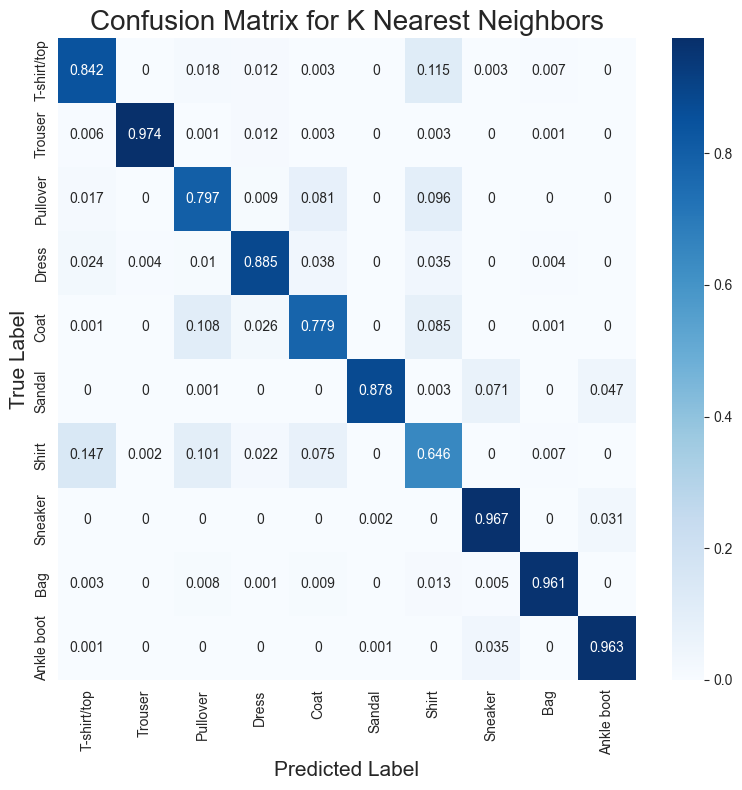

In [187]:
model_name = "K Nearest Neighbors"
model_metrics.update({model_name: metrics(y_test, y_pred_knn)})

cm = confusion_matrix(y_test, y_pred_knn)
plot_cm(cm, model_name)

## Support Vector Classifier

In [188]:
svc = SVC(C = 792.3413238490966, coef0 = 4.461801247588382, degree = 3, gamma = 2.4015292622517093, kernel = 'poly')
svc.fit(X_train_pca, y_train)

SVC(C=792.3413238490966, coef0=4.461801247588382, gamma=2.4015292622517093,
    kernel='poly')

In [189]:
y_pred_svc = svc.predict(X_test_pca)

In [190]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

Accuracy: 89.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.82      0.81      1000
           3       0.91      0.90      0.90      1000
           4       0.82      0.81      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.70      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



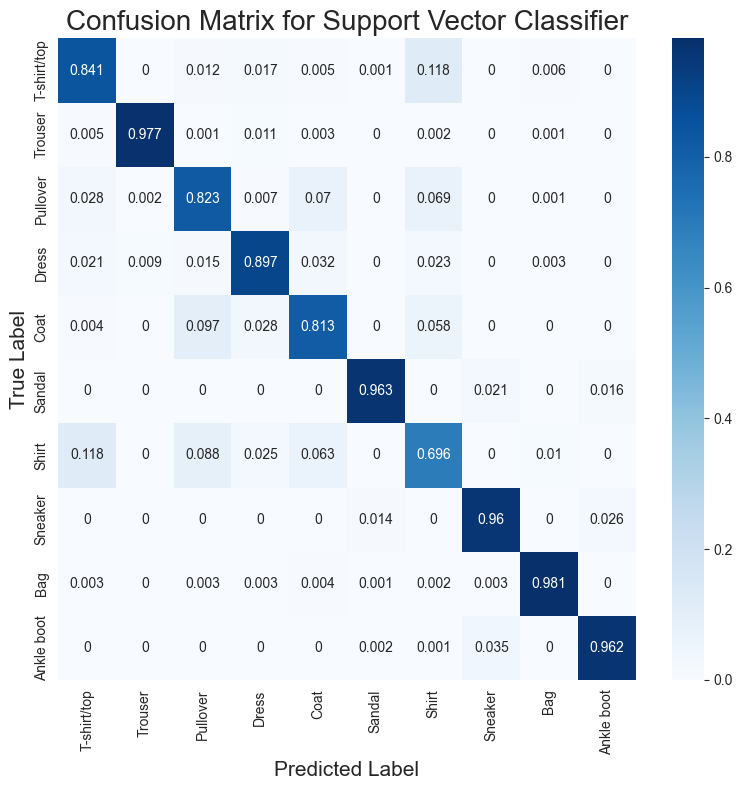

In [191]:
model_name = "Support Vector Classifier"
model_metrics.update({model_name: metrics(y_test, y_pred_svc)})

cm = confusion_matrix(y_test, y_pred_svc)
plot_cm(cm, model_name)

## XGBoost Classifier

In [192]:
xgb_clf = xgb.XGBClassifier(subsample = 0.7, max_depth = 5, learning_rate = 0.2, gamma = 0.5)
xgb_clf.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [193]:
y_pred_xgb = xgb_clf.predict(X_test_pca)

In [194]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 86.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.79      0.77      1000
           3       0.86      0.89      0.88      1000
           4       0.78      0.79      0.79      1000
           5       0.95      0.94      0.95      1000
           6       0.68      0.60      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



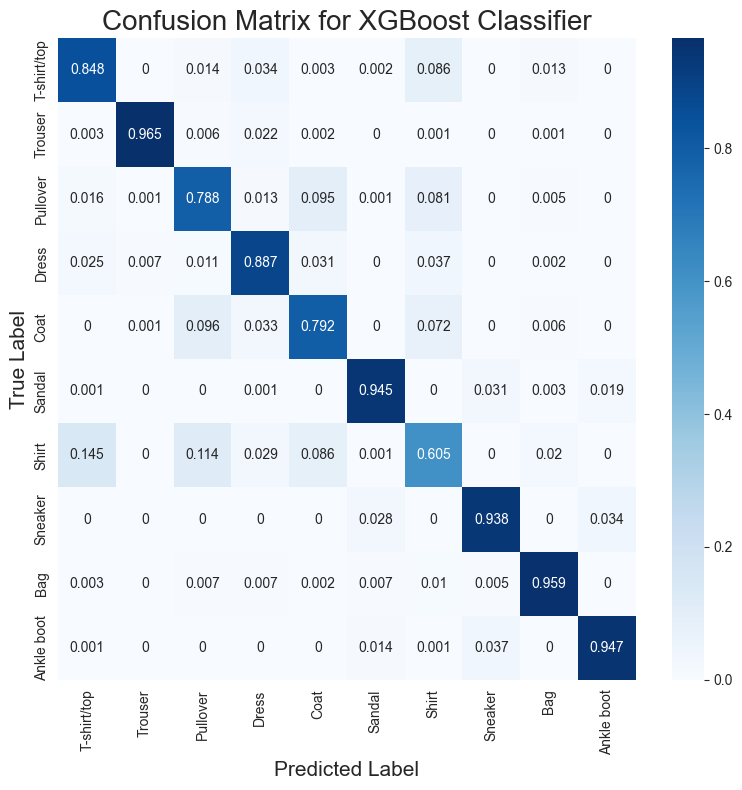

In [195]:
model_name = "XGBoost Classifier"
model_metrics.update({model_name: metrics(y_test, y_pred_xgb)})

cm = confusion_matrix(y_test, y_pred_xgb)
plot_cm(cm, model_name)

## Decision Tree Classifier

In [196]:
dtc = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, min_samples_split = 5)
dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5)

In [197]:
y_pred_dtc = dtc.predict(X_test_pca)

In [198]:
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy: {accuracy_dtc * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))

Accuracy: 78.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1000
           1       0.93      0.94      0.94      1000
           2       0.62      0.66      0.64      1000
           3       0.81      0.78      0.79      1000
           4       0.65      0.66      0.65      1000
           5       0.87      0.87      0.87      1000
           6       0.55      0.51      0.53      1000
           7       0.85      0.86      0.86      1000
           8       0.91      0.89      0.90      1000
           9       0.89      0.88      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



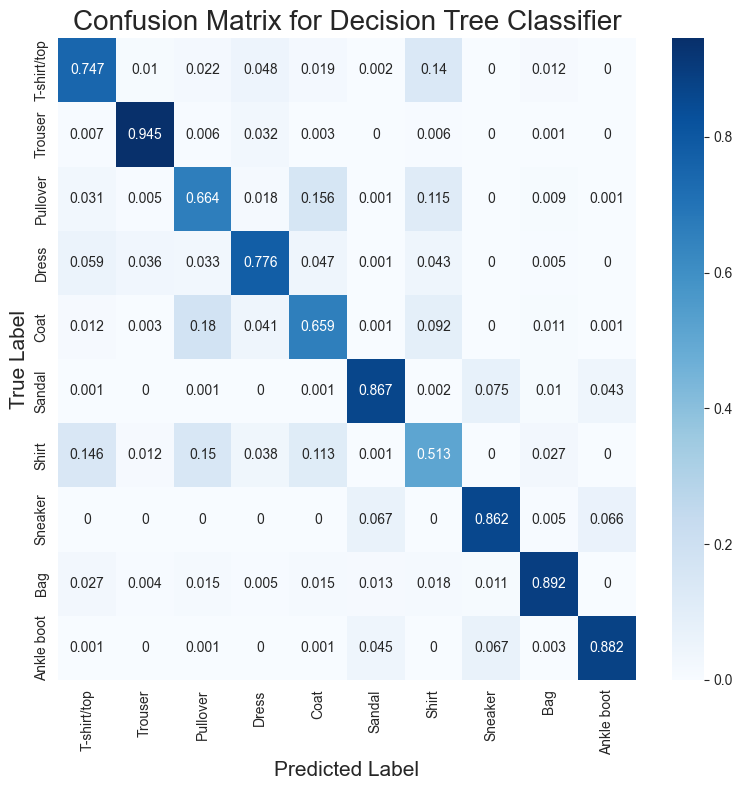

In [199]:
model_name = "Decision Tree Classifier"
model_metrics.update({model_name: metrics(y_test, y_pred_dtc)})

cm = confusion_matrix(y_test, y_pred_dtc)
plot_cm(cm, model_name)

## Random Forest Classifier

In [200]:
rfc = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 5)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(min_samples_split=5)

In [201]:
y_pred_rfc = rfc.predict(X_test_pca)

In [202]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {accuracy_rfc * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))

Accuracy: 85.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.76      0.79      0.78      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.92      0.93      0.92      1000
           6       0.70      0.57      0.62      1000
           7       0.93      0.92      0.92      1000
           8       0.92      0.95      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



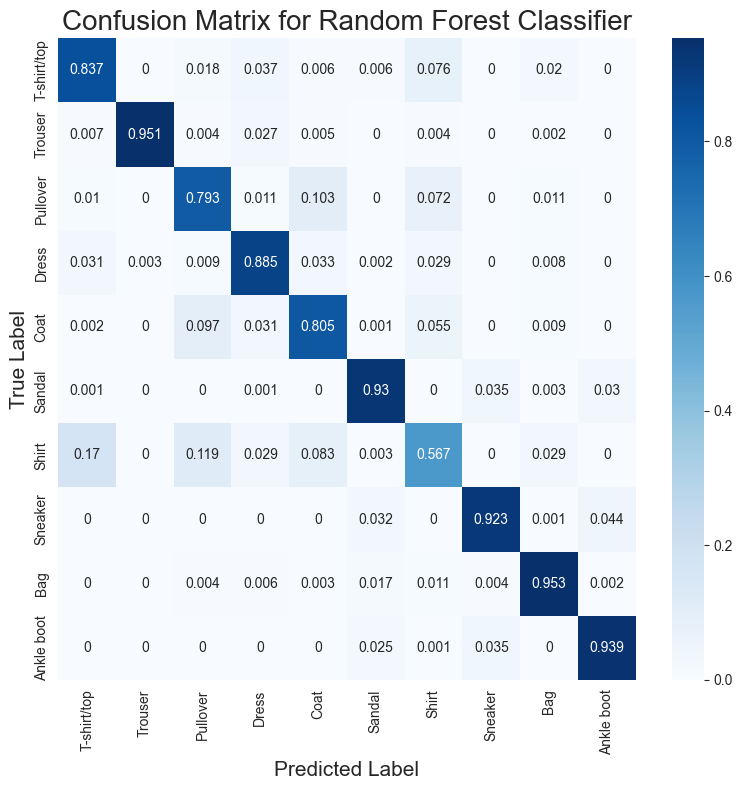

In [203]:
model_name = "Random Forest Classifier"
model_metrics.update({model_name: metrics(y_test, y_pred_rfc)})

cm = confusion_matrix(y_test, y_pred_rfc)
plot_cm(cm, model_name)

## Deep Learning Models
Please note that below architectures have been coded to run only for 3 epochs for quick evaluation purposes as a result accuracy is quite low. To view models providing higher accuracy please navigate to *FashionMNIST_ANN_CNN.ipynb*, you can also view Loss Vs Epoch and Confusion Matrix plots under *Plots* folder.

In [204]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

## Artificial Neural Network (ANN)

In [205]:
# K-fold cross-validation
k_folds = 3
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [206]:
# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.normalize = nn.BatchNorm1d(28 * 28) 
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(64, 10)  # Output layer with 10 classes
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x):
        x = self.flatten(x)
        x = self.normalize(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        x = self.softmax(x)
        return x

In [207]:
# K-fold cross-validation loop
n_epochs = 5
epoch_end = []
kf_losses = {'train': [[] for _ in range(k_folds)], 'val': [[] for _ in range(k_folds)]}
kf_accuracy = {'train': [[] for _ in range(k_folds)], 'val': [[] for _ in range(k_folds)]} #Accuracy dictionary 

for fold, (train_indices, val_indices) in enumerate(kf.split(full_train_dataset)):
    train_fold_dataset = torch.utils.data.Subset(full_train_dataset, train_indices)
    val_fold_dataset = torch.utils.data.Subset(full_train_dataset, val_indices)

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=64, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=64, shuffle=False)

    # Instantiate the model, loss function, and optimizer
    model = ANN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epoch_losses = {'train': [], 'val': []}

    patience = 2
    counter = 0 
    best_validation_loss = float('inf')  


    for epoch in range(n_epochs):
        model.train()
        train_correct = 0
        train_total = 0
        epoch_loss = 0.0

        for images, labels in train_fold_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()


        train_accuracy = train_correct / train_total    
        average_train_loss = epoch_loss / len(train_fold_loader)
        epoch_losses['train'].append(average_train_loss)

        
        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_loss = 0.0
        

        with torch.no_grad():
            for images, labels in val_fold_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()


            val_accuracy = val_correct / val_total

            average_val_loss = val_loss / len(val_fold_loader)
            epoch_losses['val'].append(average_val_loss)

        if average_val_loss < best_validation_loss:
            best_validation_loss = average_val_loss
            k = 'Eval_Models/ANN/'+'best_model_' + str(fold)
            torch.save(model.state_dict(), f'{k}.pth')
            counter = 0 
        else:
            counter +=1 

       

        if counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            epoch_end.append(epoch)
            break

        if (epoch+1) == n_epochs:
            epoch_end.append(epoch)
       
        
    


        print(f'Fold {fold + 1}, Epoch {epoch + 1}/{n_epochs}, Train Loss: {average_train_loss:.4f}, Train accuracy: {train_accuracy:.4f},  Val Loss: {average_val_loss:.4f},  Validation accuracy: {val_accuracy:.4f}, Counter: {counter}')

    kf_losses['train'][fold] = epoch_losses['train']
    kf_losses['val'][fold] = epoch_losses['val']

Fold 1, Epoch 1/5, Train Loss: 1.6783, Train accuracy: 0.7926,  Val Loss: 1.6329,  Validation accuracy: 0.8279, Counter: 0
Fold 1, Epoch 2/5, Train Loss: 1.6224, Train accuracy: 0.8392,  Val Loss: 1.6115,  Validation accuracy: 0.8492, Counter: 0
Fold 1, Epoch 3/5, Train Loss: 1.6087, Train accuracy: 0.8527,  Val Loss: 1.6070,  Validation accuracy: 0.8547, Counter: 0
Fold 1, Epoch 4/5, Train Loss: 1.6030, Train accuracy: 0.8583,  Val Loss: 1.5951,  Validation accuracy: 0.8656, Counter: 0
Fold 1, Epoch 5/5, Train Loss: 1.5982, Train accuracy: 0.8623,  Val Loss: 1.5969,  Validation accuracy: 0.8639, Counter: 1
Fold 2, Epoch 1/5, Train Loss: 1.6755, Train accuracy: 0.7955,  Val Loss: 1.6205,  Validation accuracy: 0.8417, Counter: 0
Fold 2, Epoch 2/5, Train Loss: 1.6202, Train accuracy: 0.8417,  Val Loss: 1.6231,  Validation accuracy: 0.8383, Counter: 1
Fold 2, Epoch 3/5, Train Loss: 1.6070, Train accuracy: 0.8539,  Val Loss: 1.6065,  Validation accuracy: 0.8538, Counter: 0
Fold 2, Epoch 4/

In [208]:
# Testing the model


test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = ANN()
test_accuracy_list = []
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']
for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Eval_Models/ANN/' + checkpoint))
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = test_correct / test_total
    test_accuracy_list.append(test_accuracy)

In [209]:
dict_accuracy = {'1': test_accuracy_list[0], '2': test_accuracy_list[1], '3': test_accuracy_list[2], 'Mean': np.array(test_accuracy_list).mean(), 'Standard Deviation': np.array(test_accuracy_list).std()}
df = pd.DataFrame(list(dict_accuracy.items()), columns=['Fold', 'Test Accuracy'])
df.set_index('Fold')

Test Accuracy
Fold                             
1                        0.854400
2                        0.849700
3                        0.850000
Mean                     0.851367
Standard Deviation       0.002148

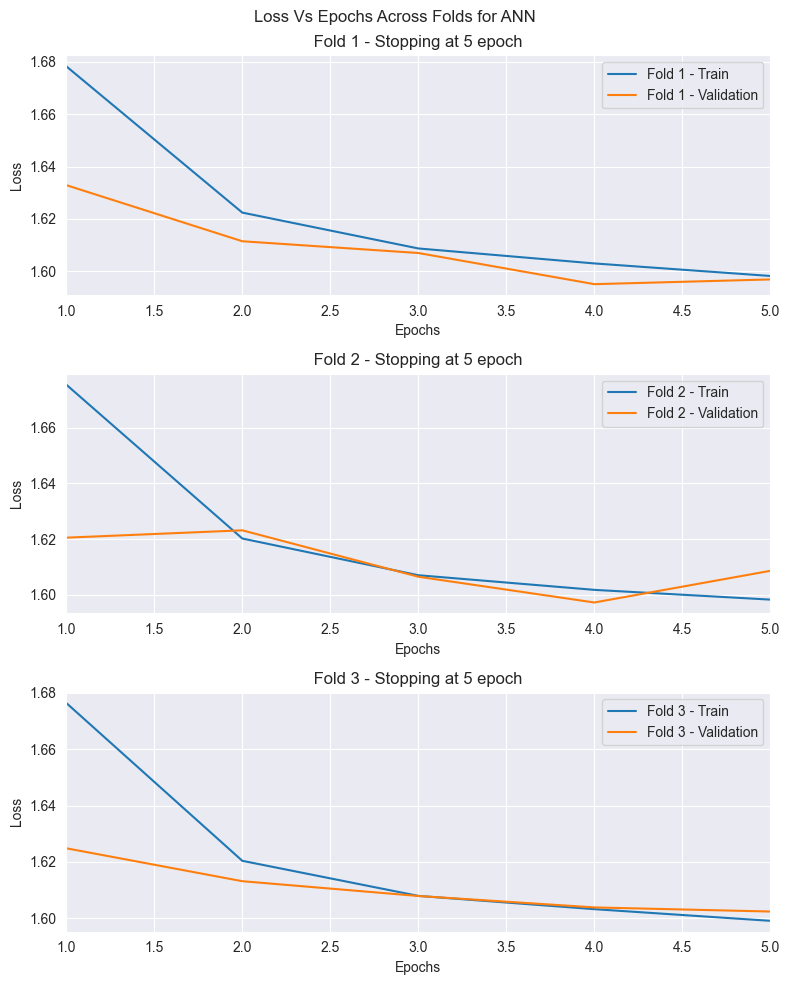

In [210]:
import matplotlib.pyplot as plt

# Assuming you have k_folds, n_epochs, and kf_losses defined

# Set up the subplots
fig, axes = plt.subplots(nrows=k_folds, ncols=1, figsize=(8, 10))
fold = 0 
max_epoch_length = np.array(epoch_end).max() + 1 

fig.suptitle('Loss Vs Epochs Across Folds for ANN')
while fold < k_folds:
    # Plot in the first subplot
    nulls_to_pad = max(0, max_epoch_length - len(kf_losses['train'][fold]))
    
    train_list = kf_losses['train'][fold] + [None] * nulls_to_pad
    val_list = kf_losses['val'][fold] + [None] * nulls_to_pad

    axes[fold].plot(range(1, max_epoch_length+1), train_list , label=f'Fold {fold + 1} - Train')
    axes[fold].plot(range(1, max_epoch_length+1), val_list, label=f'Fold {fold + 1} - Validation')
    axes[fold].set_title(f' Fold {fold+1} - Stopping at {epoch_end[fold]+1} epoch ')
    axes[fold].set_xlabel('Epochs')
    axes[fold].set_ylabel('Loss')
    axes[fold].legend()
    axes[fold].grid(True)
    axes[fold].set_xlim(1, max_epoch_length)
    fold+=1
    

# Adjust layout for better spacing
plt.tight_layout()


plt.savefig('Plots/ANN/ANN_Loss_Vs_Epoch_5.jpg', format='jpg', dpi=300)


# Show the plots
plt.show()


Precision Scores for the 3 folds: [0.8547034436485031, 0.8513252703195494, 0.8514000823010861]
Recall Scores for the 3 folds: [0.8544, 0.8497, 0.85]
F1 Scores for the 3 folds: [0.8530327792223333, 0.8487136089209005, 0.8494396147399755]


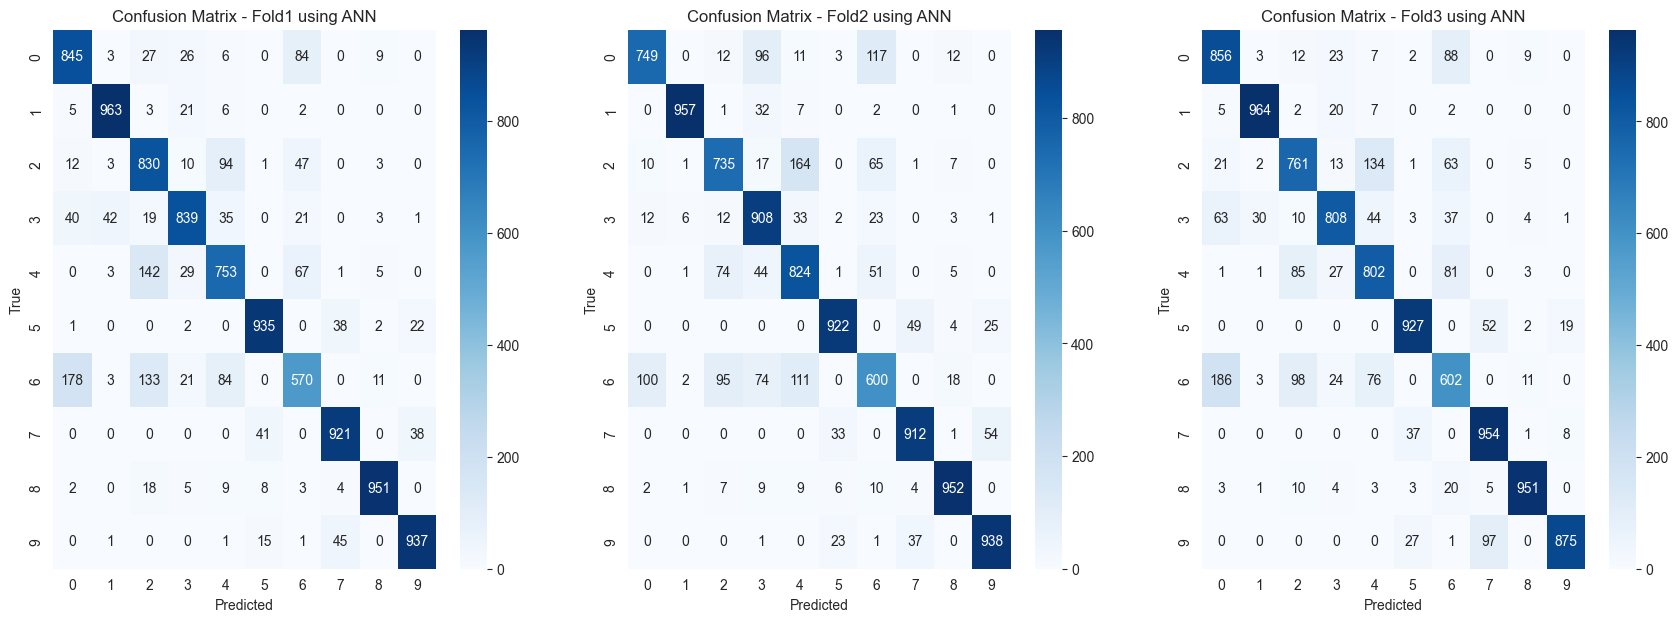

In [211]:
## Evaluation scores
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

model = ANN()
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']

for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Eval_Models/ANN/' + checkpoint))
    model.eval()
    
    # Lists to store results from each batch
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Calculate metrics for the current checkpoint
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    confusion_matrix_result = confusion_matrix(all_labels, all_predictions)
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    confusion_matrices.append(confusion_matrix_result)

    # Print or use the results as needed
print("Precision Scores for the 3 folds:", precision_list)
print("Recall Scores for the 3 folds:", recall_list)
print("F1 Scores for the 3 folds:", f1_list)


fig, axes = plt.subplots(nrows=1, ncols=len(checkpoints), figsize=(21, 7))  # Increased figure size for better visualization

# Loop through the confusion matrices and plot a heatmap for each checkpoint
for i, confusion_matrix_result in enumerate(confusion_matrices):
    class_labels = [str(label) for label in range(len(confusion_matrix_result))]
    
    # Create a heatmap using seaborn with integer formatting
    sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])
    
    axes[i].set_title(f'Confusion Matrix - Fold{i+1} using ANN')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')



# Save the figure
plt.savefig('Plots/ANN/Confusion_Matrix_ANN_5.jpg', format='jpg', dpi= 300)

plt.show()


## Testing the ANN models trained for 50 epochs

In [212]:
## Evaluation scores
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []
accuracy_list = []

model = ANN()
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']

for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Best_Models/ANN/' + checkpoint))
    model.eval()
    
    # Lists to store results from each batch
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Calculate metrics for the current checkpoint
    #precision = precision_score(all_labels, all_predictions, average='weighted')
    #recall = recall_score(all_labels, all_predictions, average='weighted')
    #f1 = f1_score(all_labels, all_predictions, average='weighted')
    #confusion_matrix_result = confusion_matrix(all_labels, all_predictions)

    eval_result = metrics(all_labels, all_predictions)
    
    accuracy_list.append(eval_result[0])
    precision_list.append(eval_result[2])
    recall_list.append(eval_result[1])
    f1_list.append(eval_result[3])
    confusion_matrices.append(confusion_matrix_result)

    # Print or use the results as needed
#print("Accuracy for model with best accuracy:", max(accuracy_list))
#print("Precision Scores for model with best accuracy:", precision_list[accuracy_list.index(max(accuracy_list))])
#print("Recall Scores for model with best accuracy:", recall_list[accuracy_list.index(max(accuracy_list))])
#print("F1 Scores for model with best accuracy:", f1_list[accuracy_list.index(max(accuracy_list))])
eval_result_final = [max(accuracy_list),recall_list[accuracy_list.index(max(accuracy_list))],precision_list[accuracy_list.index(max(accuracy_list))], f1_list[accuracy_list.index(max(accuracy_list))] ]


In [213]:
model_name = "ANN (Artificial Neural Network)"
model_metrics.update({model_name: eval_result_final})

## Convolution Neural Network

In [214]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [215]:
# K-fold cross-validation loop
n_epochs = 3
epoch_end = []
kf_losses = {'train': [[] for _ in range(k_folds)], 'val': [[] for _ in range(k_folds)]}
kf_accuracy = {'train': [[] for _ in range(k_folds)], 'val': [[] for _ in range(k_folds)]} #Accuracy dictionary 

for fold, (train_indices, val_indices) in enumerate(kf.split(full_train_dataset)):
    train_fold_dataset = torch.utils.data.Subset(full_train_dataset, train_indices)
    val_fold_dataset = torch.utils.data.Subset(full_train_dataset, val_indices)

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=64, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=64, shuffle=False)

    # Instantiate the model, loss function, and optimizer
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epoch_losses = {'train': [], 'val': []}

    patience = 1
    counter = 0 
    best_validation_loss = float('inf')  


    for epoch in range(n_epochs):
        model.train()
        train_correct = 0
        train_total = 0
        epoch_loss = 0.0

        for images, labels in train_fold_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()


        train_accuracy = train_correct / train_total    
        average_train_loss = epoch_loss / len(train_fold_loader)
        epoch_losses['train'].append(average_train_loss)

        
        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_loss = 0.0
        

        with torch.no_grad():
            for images, labels in val_fold_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()


            val_accuracy = val_correct / val_total

            average_val_loss = val_loss / len(val_fold_loader)
            epoch_losses['val'].append(average_val_loss)

        if average_val_loss < best_validation_loss:
            best_validation_loss = average_val_loss
            k = 'Eval_Models/CNN/'+'best_model_' + str(fold)
            torch.save(model.state_dict(), f'{k}.pth')
            counter = 0 
        else:
            counter +=1 
        

        if counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            epoch_end.append(epoch)
            break

        if (epoch+1) == n_epochs:
            epoch_end.append(epoch)


        print(f'Fold {fold + 1}, Epoch {epoch + 1}/{n_epochs}, Train Loss: {average_train_loss:.4f}, Train accuracy: {train_accuracy:.4f},  Val Loss: {average_val_loss:.4f},  Validation accuracy: {val_accuracy:.4f}, Counter: {counter}')

    kf_losses['train'][fold] = epoch_losses['train']
    kf_losses['val'][fold] = epoch_losses['val']

Fold 1, Epoch 1/3, Train Loss: 1.7008, Train accuracy: 0.7642,  Val Loss: 1.6098,  Validation accuracy: 0.8532, Counter: 0
Fold 1, Epoch 2/3, Train Loss: 1.6073, Train accuracy: 0.8547,  Val Loss: 1.5967,  Validation accuracy: 0.8647, Counter: 0
Fold 1, Epoch 3/3, Train Loss: 1.5905, Train accuracy: 0.8714,  Val Loss: 1.5856,  Validation accuracy: 0.8764, Counter: 0
Fold 2, Epoch 1/3, Train Loss: 1.7014, Train accuracy: 0.7630,  Val Loss: 1.6466,  Validation accuracy: 0.8155, Counter: 0
Fold 2, Epoch 2/3, Train Loss: 1.6432, Train accuracy: 0.8178,  Val Loss: 1.6395,  Validation accuracy: 0.8231, Counter: 0
Fold 2, Epoch 3/3, Train Loss: 1.6158, Train accuracy: 0.8459,  Val Loss: 1.5962,  Validation accuracy: 0.8665, Counter: 0
Fold 3, Epoch 1/3, Train Loss: 1.7232, Train accuracy: 0.7410,  Val Loss: 1.6313,  Validation accuracy: 0.8307, Counter: 0
Fold 3, Epoch 2/3, Train Loss: 1.6072, Train accuracy: 0.8549,  Val Loss: 1.5949,  Validation accuracy: 0.8670, Counter: 0
Fold 3, Epoch 3/

In [216]:
# Testing the model
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = CNN()
test_accuracy_list = []
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']
for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Eval_Models/CNN/' + checkpoint))
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = test_correct / test_total
    test_accuracy_list.append(test_accuracy)

In [217]:
dict_accuracy = {'1': test_accuracy_list[0], '2': test_accuracy_list[1], '3': test_accuracy_list[2], 'Mean': np.array(test_accuracy_list).mean(), 'Standard Deviation': np.array(test_accuracy_list).std()}
df = pd.DataFrame(list(dict_accuracy.items()), columns=['Fold', 'Test Accuracy'])
df.set_index('Fold')

Test Accuracy
Fold                             
1                        0.864500
2                        0.857900
3                        0.863800
Mean                     0.862067
Standard Deviation       0.002960

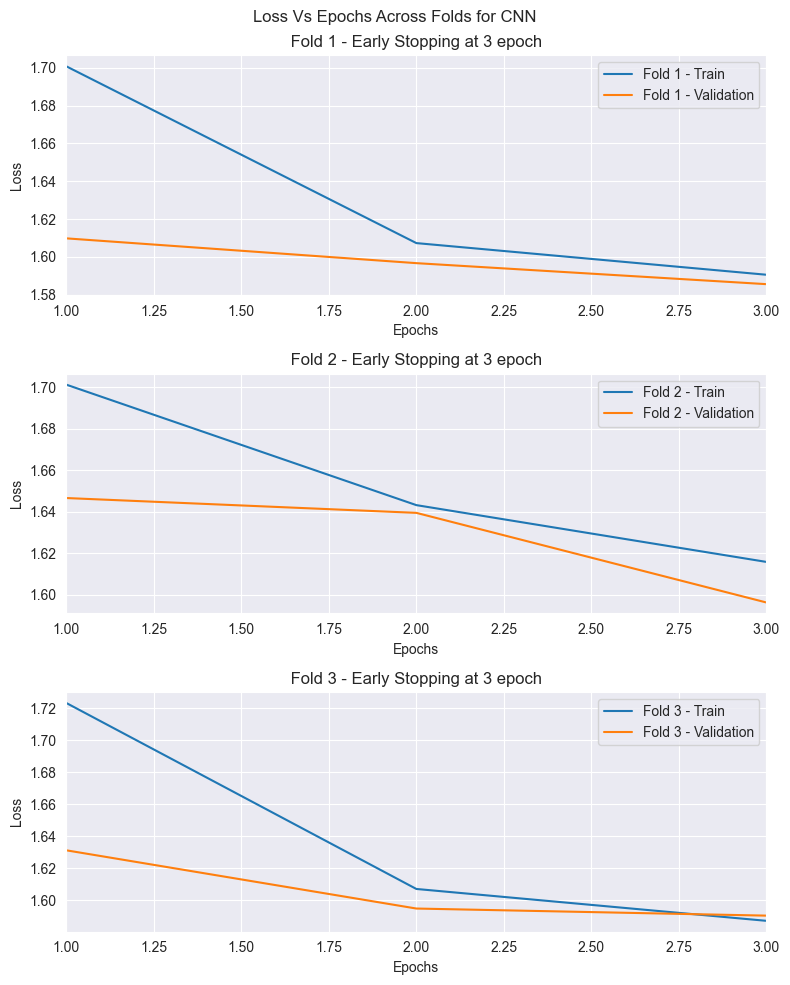

In [218]:
import matplotlib.pyplot as plt

# Assuming you have k_folds, n_epochs, and kf_losses defined

# Set up the subplots
fig, axes = plt.subplots(nrows=k_folds, ncols=1, figsize=(8, 10))
fold = 0 
max_epoch_length = np.array(epoch_end).max() + 1 

fig.suptitle('Loss Vs Epochs Across Folds for CNN')
while fold < k_folds:
    # Plot in the first subplot
    nulls_to_pad = max(0, max_epoch_length - len(kf_losses['train'][fold]))
    
    train_list = kf_losses['train'][fold] + [None] * nulls_to_pad
    val_list = kf_losses['val'][fold] + [None] * nulls_to_pad

    axes[fold].plot(range(1, max_epoch_length+1), train_list , label=f'Fold {fold + 1} - Train')
    axes[fold].plot(range(1, max_epoch_length+1), val_list, label=f'Fold {fold + 1} - Validation')
    axes[fold].set_title(f' Fold {fold+1} - Early Stopping at {epoch_end[fold]+1} epoch ')
    axes[fold].set_xlabel('Epochs')
    axes[fold].set_ylabel('Loss')
    axes[fold].legend()
    axes[fold].grid(True)
    axes[fold].set_xlim(1, max_epoch_length)
    fold+=1
    

# Adjust layout for better spacing
plt.tight_layout()


# Save the figure
plt.savefig('Plots/CNN/CNN_Loss_Vs_Epoch_3.jpg', format='jpg', dpi=300)


# Show the plots
plt.show()


Precision Scores for the 3 folds: [0.8660217360504215, 0.8573340564651452, 0.870219693994202]
Recall Scores for the 3 folds: [0.8645, 0.8579, 0.8638]
F1 Scores for the 3 folds: [0.8627199738075747, 0.8549652338180976, 0.8652655987667447]


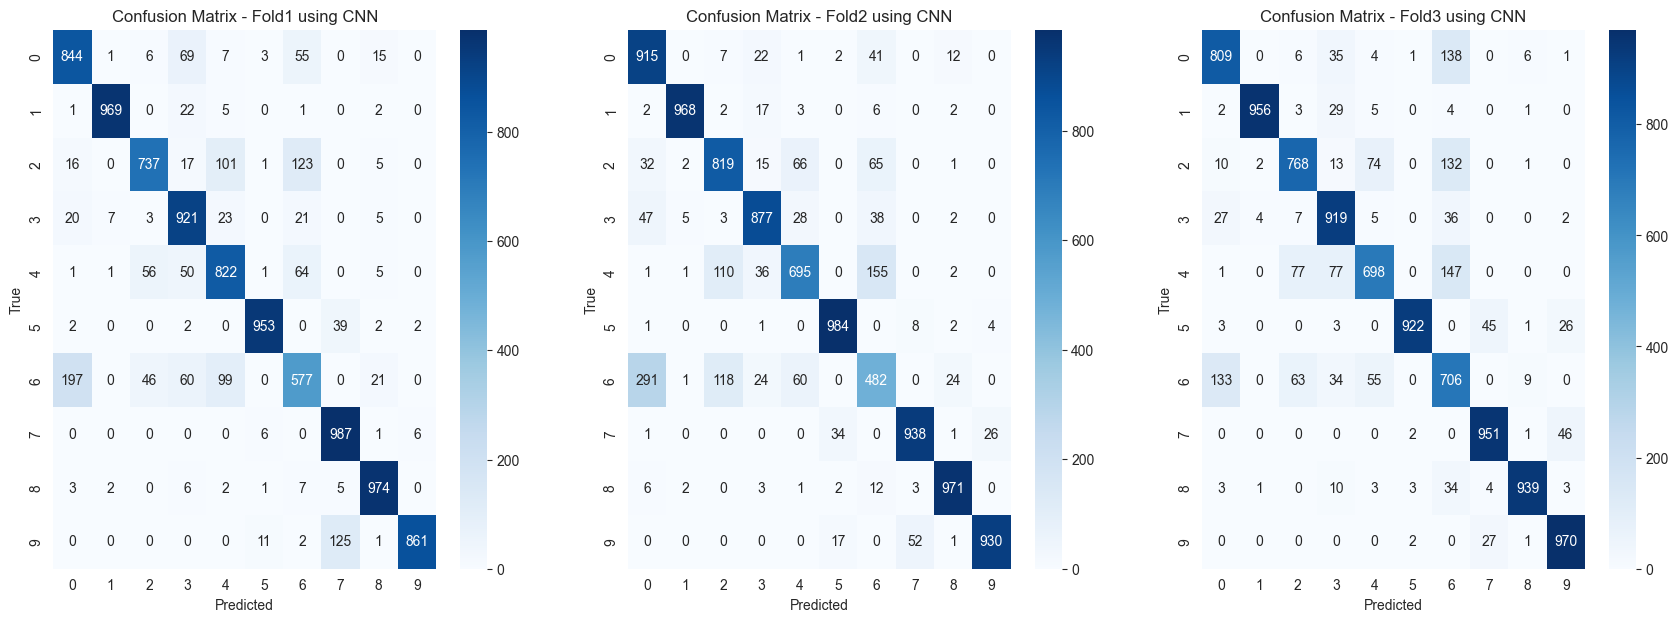

In [219]:
## Evaluation scores
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

model = CNN()
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']

for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Eval_Models/CNN/' + checkpoint))
    model.eval()
    
    # Lists to store results from each batch
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Calculate metrics for the current checkpoint
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    confusion_matrix_result = confusion_matrix(all_labels, all_predictions)
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    confusion_matrices.append(confusion_matrix_result)

    # Print or use the results as needed
print("Precision Scores for the 3 folds:", precision_list)
print("Recall Scores for the 3 folds:", recall_list)
print("F1 Scores for the 3 folds:", f1_list)


fig, axes = plt.subplots(nrows=1, ncols=len(checkpoints), figsize=(21, 7))  # Increased figure size for better visualization

# Loop through the confusion matrices and plot a heatmap for each checkpoint
for i, confusion_matrix_result in enumerate(confusion_matrices):
    class_labels = [str(label) for label in range(len(confusion_matrix_result))]
    
    # Create a heatmap using seaborn with integer formatting
    sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])
    
    axes[i].set_title(f'Confusion Matrix - Fold{i+1} using CNN')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')



# Save the figure
plt.savefig('Plots/CNN/Confusion_Matrix_CNN_3.jpg', format='jpg', dpi=300)

plt.show()


## Testing the CNN models trained for 50 epochs

In [220]:
## Evaluation scores
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []
accuracy_list = []

model = CNN()
checkpoints = ['best_model_0.pth', 'best_model_1.pth', 'best_model_2.pth']

for checkpoint in checkpoints:
    model.load_state_dict(torch.load('Best_Models/CNN/' + checkpoint))
    model.eval()
    
    # Lists to store results from each batch
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Calculate metrics for the current checkpoint
    #precision = precision_score(all_labels, all_predictions, average='weighted')
    #recall = recall_score(all_labels, all_predictions, average='weighted')
    #f1 = f1_score(all_labels, all_predictions, average='weighted')
    #confusion_matrix_result = confusion_matrix(all_labels, all_predictions)

    eval_result = metrics(all_labels, all_predictions)
    
    accuracy_list.append(eval_result[0])
    precision_list.append(eval_result[2])
    recall_list.append(eval_result[1])
    f1_list.append(eval_result[3])
    confusion_matrices.append(confusion_matrix_result)

    # Print or use the results as needed
#print("Accuracy for model with best accuracy:", max(accuracy_list))
#print("Precision Scores for model with best accuracy:", precision_list[accuracy_list.index(max(accuracy_list))])
#print("Recall Scores for model with best accuracy:", recall_list[accuracy_list.index(max(accuracy_list))])
#print("F1 Scores for model with best accuracy:", f1_list[accuracy_list.index(max(accuracy_list))])
eval_result_final = [max(accuracy_list),recall_list[accuracy_list.index(max(accuracy_list))],precision_list[accuracy_list.index(max(accuracy_list))], f1_list[accuracy_list.index(max(accuracy_list))] ]


In [241]:
model_name = "CNN (Convolution Neural Network)"
model_metrics.update({model_name: eval_result_final})

In [242]:
df = pd.DataFrame(model_metrics).T
df = df.rename(columns = {0:'Test Accuracy', 1:'Recall Score', 2:'Precision Score', 3:'F1-Score'}).sort_values(by = 'Test Accuracy')

In [244]:
df

Test Accuracy  Recall Score  \
Decision Tree Classifier                 0.7807        0.7807   
Logistic Regression                      0.8422        0.8422   
Random Forest Classifier                 0.8583        0.8583   
XGBoost Classifier                       0.8674        0.8674   
K Nearest Neighbors                      0.8692        0.8692   
ANN (Artificial Neural Network)          0.8742        0.8742   
Support Vector Classifier                0.8913        0.8913   
CNN (Convolution Neural Network)         0.9128        0.9128   

                                  Precision Score  F1-Score  
Decision Tree Classifier                 0.780819  0.780528  
Logistic Regression                      0.840595  0.841096  
Random Forest Classifier                 0.856666  0.856589  
XGBoost Classifier                       0.866273  0.866534  
K Nearest Neighbors                      0.871420  0.869639  
ANN (Artificial Neural Network)          0.874743  0.873559  
Support Vector Classifier                0.891382  0.891259  
CNN (Convolution Neural Network)         0.912438  0.912490

We get that CNN provides the best accuracy in classifying FashionMNIST images, considering ML models Support Vector Classifier provides the second best accuracy. As mentioned in report, CNN can provide top accuracies with more complex architecture however, if the focus is reduced computation time at the cost of reduced accuracy, SVC would be the next option as per our experiments.

##